In [1]:
import sys
import os

from matplotlib import pyplot as plt
# from sklearn.datasets import make_classification
import numpy as np
import seaborn as sns

import seaborn as sns

import re

sns.set_style('whitegrid')

In [2]:
fig_loc = "figs/"
if not os.path.exists(fig_loc):
    os.makedirs(fig_loc)

In [3]:
neat_gen150 = "outputs/output_10.06_11.57/output.txt" # NEAT
puis_gen150 = "outputs/output_10.06_12.02/output.txt" # PUISSANCE

neat_pop150 = "outputs/output_10.06_23.12/output.txt" # NEAT
puis_pop150 = "outputs/output_10.06_23.02/output.txt" # PUISSANCE

In [4]:
results = {}

In [5]:
results['neat_gen150'] = open(neat_gen150, "r").read()
results['puis_gen150'] = open(puis_gen150, "r").read()

results['neat_pop150'] = open(neat_pop150, "r").read()
results['puis_pop150'] = open(puis_pop150, "r").read()

In [6]:
def find_metric_in_output(output, string):    
    result = re.findall(r"\b"+string+r" ([0-9]+\.[0-9]+)\b", str(output))
    
    result = np.array(result).astype('float')
        
    return result 

In [7]:
def find_species_in_output(output, string):    
    result = re.findall(r"\b"+string+r" ([0-9]+)\b", str(output))
    
    result = np.array(result).astype('float')
        
    return result 

In [8]:
def generate_items(GENS):
    items = {}

    for key in results.keys():
        gen_time = find_metric_in_output(results[key], "Generation time:")

        gen_time = gen_time / 3600

        cum_gen_time = np.array([])

        for i in range(1,len(gen_time)+1):
            cum_gen_time = np.append(cum_gen_time, gen_time[:i].sum())

        items[key] = {}

        items[key]['best_fitness'] = find_metric_in_output(results[key], "Best fitness:")
        items[key]['avg_adj_fitness'] = find_metric_in_output(results[key], "Average adjusted fitness:")
        items[key]['pop_avg_fitness'] = find_metric_in_output(results[key], "Population's average fitness:")
        items[key]['gen_time'] = gen_time
        items[key]['cum_gen_time'] = cum_gen_time

        if 'puis' in key:
            items[key]['sigma'] = find_metric_in_output(results[key], "Sigma:")

        for k,v in zip(items[key].keys(),items[key].values()):
            items[key][k] = items[key][k][:GENS]
            
    return items

In [9]:
items = generate_items(150)

In [10]:
# Make sure gens is at max for this
new = items['puis_pop150']['best_fitness']
old = items['neat_pop150']['best_fitness']

(100 - ((old/new)*100))

array([16.66875   , 10.41875   , 10.41875   ,  1.04375   ,  4.04242424,
        4.04242424,  5.00389992,  6.86470588, 10.38093621,  4.62777778,
        4.62777778,  6.36011564, 11.11282051, 11.11282051, 11.76322291,
       11.76322291, 13.9330153 , 13.9330153 , 13.9330153 , 13.9330153 ,
       13.9330153 , 13.9330153 , 13.9330153 ,  4.09678847,  4.09678847,
        4.09678847,  4.09678847, 10.00138459, 10.00138459, 10.00138459,
       10.00138459, 10.00138459, 10.00138459, 10.00138459, 10.00138459,
       10.00138459, 13.33333333, 13.33333333, 13.33333333, 15.2173913 ,
       15.2173913 , 15.2173913 , 17.0212766 , 17.0212766 , 17.0212766 ,
       17.0212766 , 17.0212766 , 17.0212766 , 20.40816327, 20.40816327])

In [11]:
"""
Plotting the results
"""
def plot_results(plots, xlabel, ylabel, fig_name, GENS):
    fig,ax = plt.subplots(figsize=(15,6))
    bbox = fig.get_tightbbox(fig.canvas.get_renderer())

    for i in range(0,len(plots)):
        plt.plot(plots[i]['value'],
                 label = plots[i]['label'],
                 ls = plots[i]['linestyle'],
                 color = plots[i]['color'])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()

    plt.xticks(np.arange(0, GENS+1, 5))

    plt.savefig(fig_loc+fig_name, bbox_inches='tight')

    plt.plot()

In [12]:
def plot_wall_time(plots, xlabel, ylabel, fig_name, GENS):
    fig,ax = plt.subplots(figsize=(15,6))
    bbox = fig.get_tightbbox(fig.canvas.get_renderer())

    for i in range(0,len(plots)):
        plt.plot(plots[i]['x'],
                 plots[i]['y'],
                 label = plots[i]['label'],
                 ls = plots[i]['linestyle'],
                 color = plots[i]['color'])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()

    plt.xticks(np.arange(0, np.ceil(plots[0]['x'].max())+12, 5))

    plt.savefig(fig_loc+fig_name, bbox_inches='tight')

    plt.plot()

In [13]:
# Puissance 150 generations: m
# NEAT 150 generations: c
# Puissance 150 populations: r
# NEAR 150 populations: b

# Plots for 150 gens

In [14]:
GENS = 150
items = generate_items(GENS)

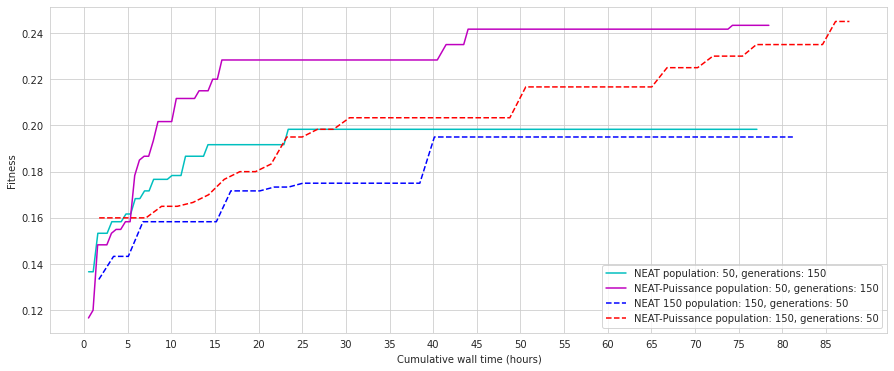

In [15]:
plots = {}

plot1 = items['neat_gen150']
plot2 = items['puis_gen150']

plot3 = items['neat_pop150']
plot4 = items['puis_pop150']

plots[0] = {
    "x":plot1['cum_gen_time'],
    "y":plot1['best_fitness'],
    "label":"NEAT population: 50, generations: 150",
    "linestyle":"-",
    "color":"c"
}

plots[1] = {
    "x":plot2['cum_gen_time'],
    "y":plot2['best_fitness'],
    "label":"NEAT-Puissance population: 50, generations: 150",
    "linestyle":"-",
    "color":"m"
}

plots[2] = {
    "x":plot3['cum_gen_time'],
    "y":plot3['best_fitness'],
    "label":"NEAT 150 population: 150, generations: 50",
    "linestyle":"--",
    "color":"b"
}

plots[3] = {
    "x":plot4['cum_gen_time'],
    "y":plot4['best_fitness'],
    "label":"NEAT-Puissance population: 150, generations: 50",
    "linestyle":"--",
    "color":"r"
}

plot_wall_time(plots, "Cumulative wall time (hours)", "Fitness", "wall_time_best_fitness_pop50_all.png", GENS=GENS)

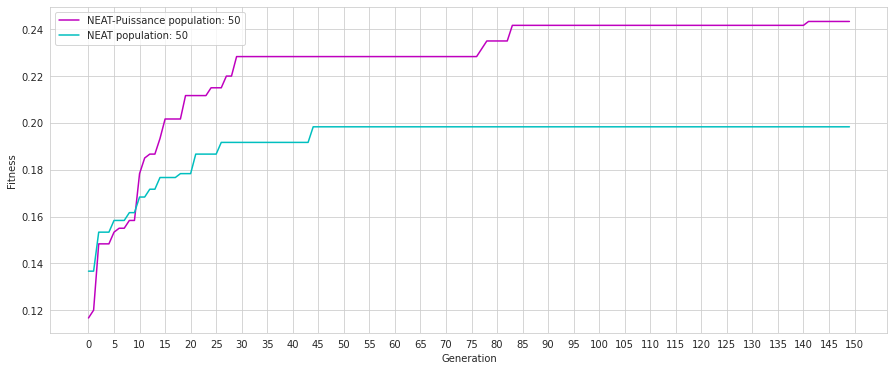

In [16]:
plots = {}

plot1 = items['puis_gen150']['best_fitness']
plot2= items['neat_gen150']['best_fitness']

plots[0] = {
    "value":plot1,
    "label":"NEAT-Puissance population: 50",
    "linestyle":"-",
    "color":"m"
}

plots[1] = {
    "value":plot2,
    "label":"NEAT population: 50",
    "linestyle":"-",
    "color":"c"
}

plot_results(plots, "Generation", "Fitness", "best_fitness_pop50_both.png", GENS=GENS)

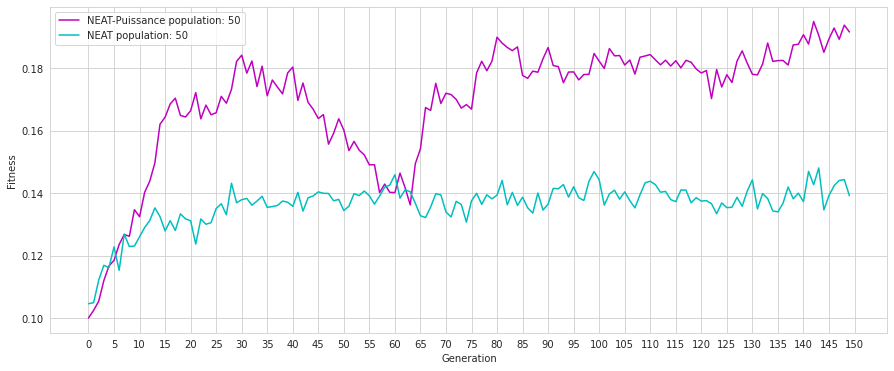

In [17]:
plots = {}

plot1 = items['puis_gen150']['pop_avg_fitness']
plot2= items['neat_gen150']['pop_avg_fitness']

plots[0] = {
    "value":plot1,
    "label":"NEAT-Puissance population: 50",
    "linestyle":"-",
    "color":"m"
}

plots[1] = {
    "value":plot2,
    "label":"NEAT population: 50",
    "linestyle":"-",
    "color":"c"
}

plot_results(plots, "Generation", "Fitness", "pop_avg_fitness_pop50_both.png", GENS=GENS)

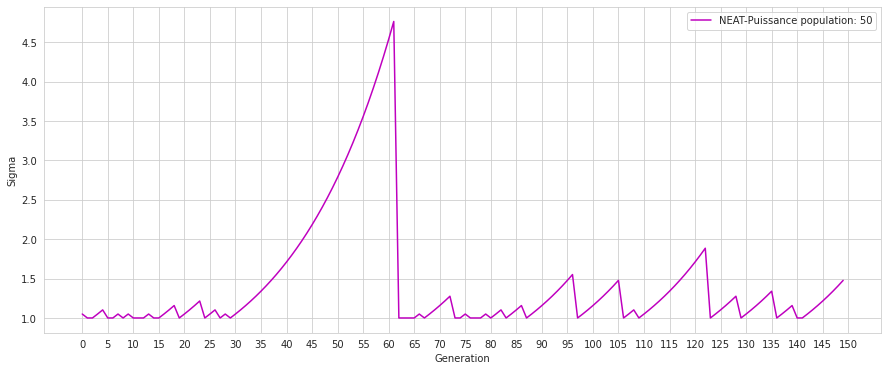

In [18]:
plots = {}

plot1= items['puis_gen150']['sigma']

plots[0] = {
    "value":plot1,
    "label":"NEAT-Puissance population: 50",
    "linestyle":"-",
    "color":"m"
}

plot_results(plots, "Generation", "Sigma", "sigma_puissance_pop50_puis.png", GENS=GENS)

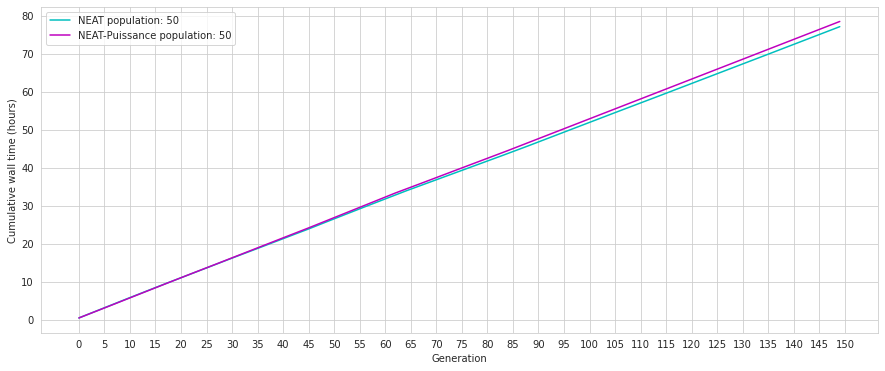

In [19]:
plots = {}

plot1 = items['neat_gen150']['cum_gen_time']
plot2= items['puis_gen150']['cum_gen_time']

plots[0] = {
    "value":plot1,
    "label":"NEAT population: 50",
    "linestyle":"-",
    "color":"c"
}

plots[1] = {
    "value":plot2,
    "label":"NEAT-Puissance population: 50",
    "linestyle":"-",
    "color":"m"
}

plot_results(plots, "Generation", "Cumulative wall time (hours)", "cum_gen_time_pop50_both.png", GENS=GENS)

# Plots for 50 gens

In [20]:
GENS = 50
items = generate_items(GENS)

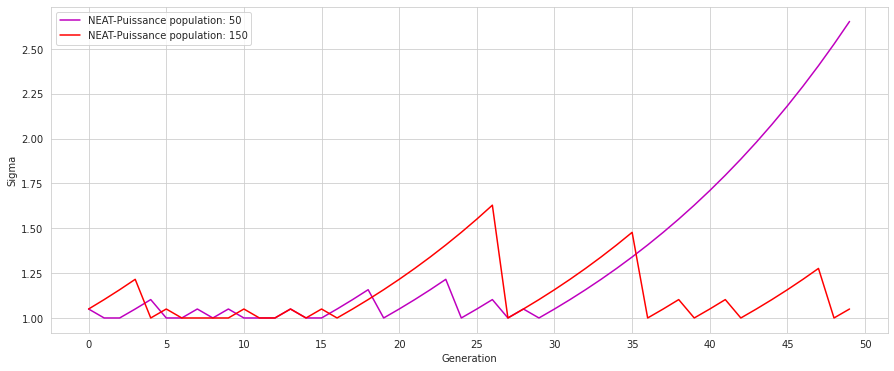

In [21]:
plots = {}

plot1= items['puis_gen150']['sigma']
plot2= items['puis_pop150']['sigma']

plots[0] = {
    "value":plot1,
    "label":"NEAT-Puissance population: 50",
    "linestyle":"-",
    "color":"m"
}

plots[1] = {
    "value":plot2,
    "label":"NEAT-Puissance population: 150",
    "linestyle":"-",
    "color":"r"
}

plot_results(plots, "Generation", "Sigma", "sigma_puissance_both.png", GENS=GENS)

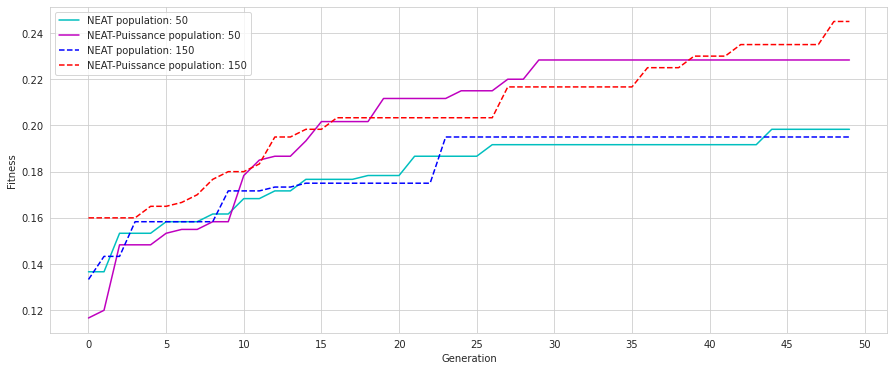

In [22]:
plots = {}

plot1 = items['neat_gen150']['best_fitness']
plot2= items['puis_gen150']['best_fitness']

plot3 = items['neat_pop150']['best_fitness']
plot4 = items['puis_pop150']['best_fitness']

plots[0] = {
    "value":plot1,
    "label":"NEAT population: 50",
    "linestyle":"-",
    "color":"c"
}

plots[1] = {
    "value":plot2,
    "label":"NEAT-Puissance population: 50",
    "linestyle":"-",
    "color":"m"
}

plots[2] = {
    "value":plot3,
    "label":"NEAT population: 150",
    "linestyle":"--",
    "color":"b"
}

plots[3] = {
    "value":plot4,
    "label":"NEAT-Puissance population: 150"  ,
    "linestyle":"--",
    "color":"r"
}

plot_results(plots, "Generation", "Fitness", "best_fitness_all.png", GENS=GENS)

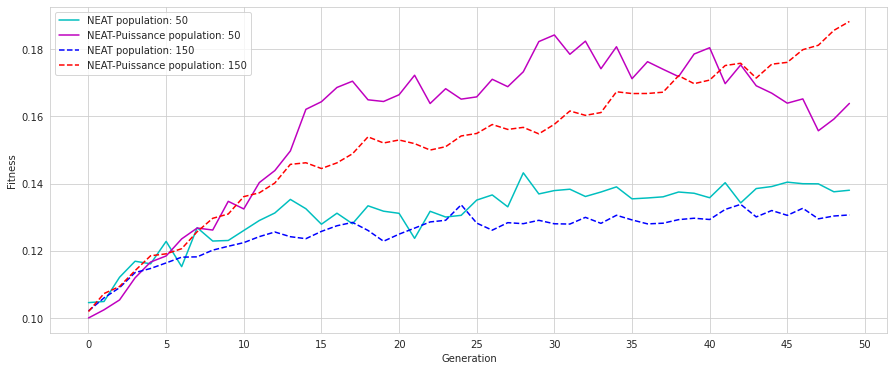

In [23]:
plots = {}

plot1 = items['neat_gen150']['pop_avg_fitness']
plot2= items['puis_gen150']['pop_avg_fitness']

plot3 = items['neat_pop150']['pop_avg_fitness']
plot4 = items['puis_pop150']['pop_avg_fitness']

plots[0] = {
    "value":plot1,
    "label":"NEAT population: 50",
    "linestyle":"-",
    "color":"c"
}

plots[1] = {
    "value":plot2,
    "label":"NEAT-Puissance population: 50",
    "linestyle":"-",
    "color":"m"
}

plots[2] = {
    "value":plot3,
    "label":"NEAT population: 150",
    "linestyle":"--",
    "color":"b"
}

plots[3] = {
    "value":plot4,
    "label":"NEAT-Puissance population: 150",
    "linestyle":"--",
    "color":"r"
}

plot_results(plots, "Generation", "Fitness", "pop_avg_fitness_all.png", GENS=GENS)

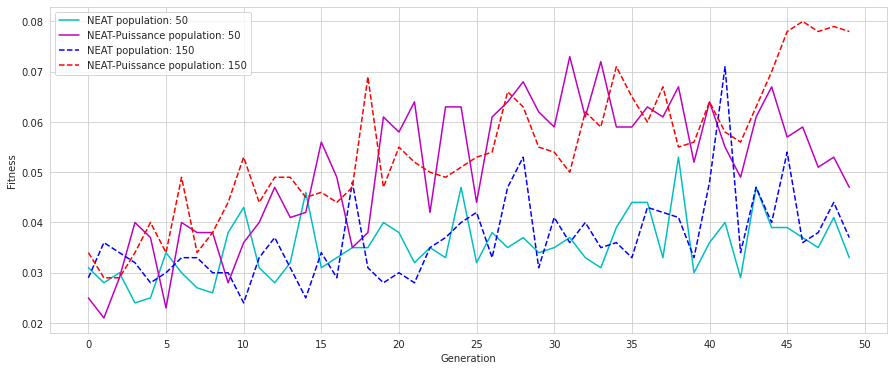

In [24]:
plots = {}

plot1 = items['neat_gen150']['avg_adj_fitness']
plot2= items['puis_gen150']['avg_adj_fitness']

plot3 = items['neat_pop150']['avg_adj_fitness']
plot4 = items['puis_pop150']['avg_adj_fitness']

plots[0] = {
    "value":plot1,
    "label":"NEAT population: 50",
    "linestyle":"-",
    "color":"c"
}

plots[1] = {
    "value":plot2,
    "label":"NEAT-Puissance population: 50",
    "linestyle":"-",
    "color":"m"
}

plots[2] = {
    "value":plot3,
    "label":"NEAT population: 150",
    "linestyle":"--",
    "color":"b"
}

plots[3] = {
    "value":plot4,
    "label":"NEAT-Puissance population: 150",
    "linestyle":"--",
    "color":"r"
}

plot_results(plots, "Generation", "Fitness", "avg_adj_fitness_all.png", GENS=GENS)

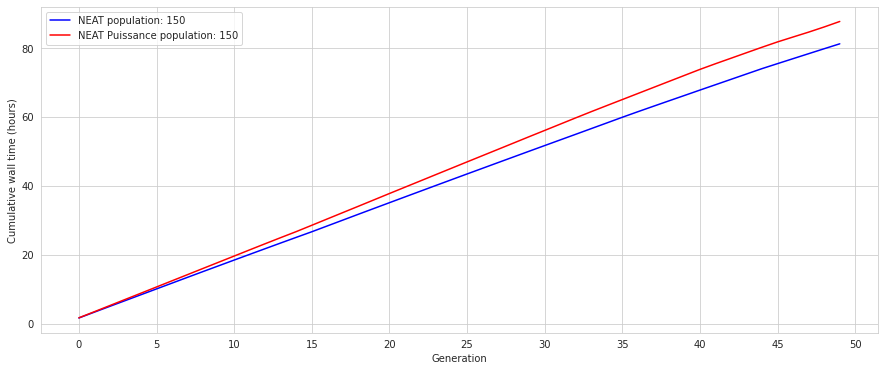

In [25]:
plots = {}

plot1 = items['neat_pop150']['cum_gen_time']
plot2 = items['puis_pop150']['cum_gen_time']

plots[0] = {
    "value":plot1,
    "label":"NEAT population: 150",
    "linestyle":"-",
    "color":"b"
}

plots[1] = {
    "value":plot2,
    "label":"NEAT Puissance population: 150",
    "linestyle":"-",
    "color":"r"
}

plot_results(plots, "Generation", "Cumulative wall time (hours)", "cum_gen_time_pop150_both.png", GENS=GENS)